# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install imageio[ffmpeg]
import imageio.v2 as imageio
import glob

## Studied cases:
- J = 101, c_f = 0.5
- J = 101, c_f = 0.8
- J = 301, c_f = 0.5

In [12]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 301    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
#l2norm, time for case 1
#l2norm_cf, time _cf for case 2
#l2norm_301, time_301 for case 3
l2norm_301=[]
l2norm_301.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time_301=[]
time_301.append(0.0)

nx= 301
dx= 0.03333333333333333
dt= 0.016666666666666666
Number of iterations= 1200.0


In [13]:
#create directory where to save images
print(os.getcwd())

os.makedirs('./images_leapfrog', exist_ok=True)
os.listdir('./')

C:\Users\balza\Desktop\Numerical Relativity


['.ipynb_checkpoints',
 'Advection_Equation_1FTCS.ipynb',
 'Advection_Equation_1LF.ipynb',
 'Advection_Equation_Leapfrog.ipynb',
 'Advection_Equation_Leapfrog_OF_BC.ipynb',
 'Advection_Equation_LW.ipynb',
 'Advection_Equation_stepLeapfrog.ipynb',
 'Advection_Equation_StepLF.ipynb',
 'Advection_Equation_StepLW.ipynb',
 'Burgers_eq.ipynb',
 'images_BURG',
 'images_BURG_non',
 'images_FTCS',
 'images_leapfrog',
 'images_LF',
 'images_LW',
 'images_stepleapfrog',
 'images_stepLF',
 'images_stepLW',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'movie_BURG.mp4',
 'movie_BURG_non.mp4',
 'movie_FTCS.mp4',
 'movie_leapfrog.mp4',
 'movie_LF.mp4',
 'movie_LW.mp4',
 'movie_step.mp4',
 'movie_stepleapfrog.mp4',
 'movie_stepLF.mp4',
 'movie_stepLW.mp4']

In [14]:
# Initilize time and iteration counter
t = 0.0
i = 0

u_iter = []
t_iter = []

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_leapfrog/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    if t == 0:
        #u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
        u_next = np.exp(-(x-a*dt-x0)**2)
    else:
        u_next = u_preaveous - a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    
    u_preaveous = u_current.copy()
    #Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    #cange them for the three cases
    l2norm_301.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time_301.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        u_iter.append(u_current)
        t_iter.append(t)
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_leapfrog/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


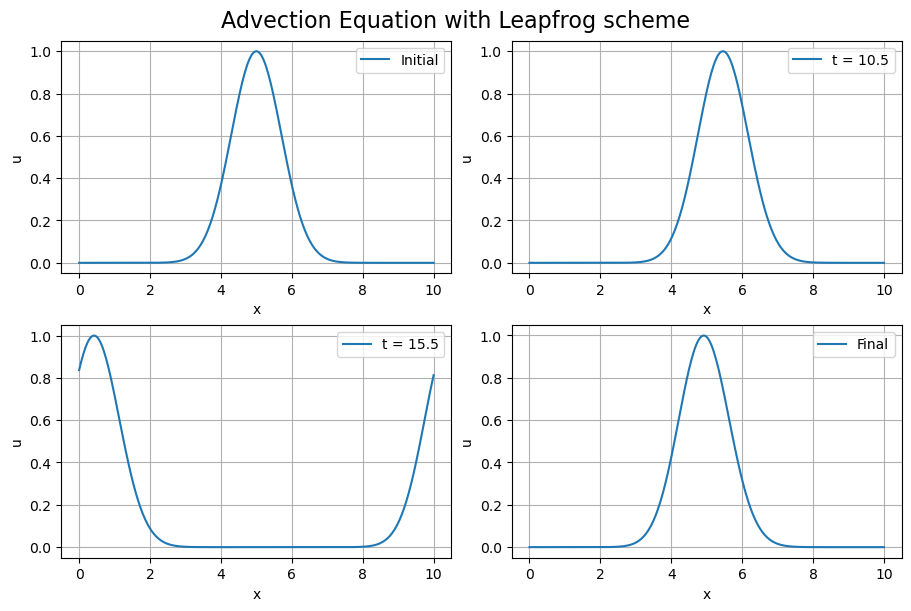

In [15]:
# Plot the final solution

'''fig = plt.plot(figsize=(9,6))
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_iter[20], label='t = %s' %round(t_iter[20],2))
plt.plot(x, u_iter[30], label='t = %s' %round(t_iter[30],2))
plt.plot(x, u_current, label='Final')
plt.title('Advection Equation with Leapfrog scheme', fontsize=14)
#plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('./images_leapfrog/leapfrog_plot_1.png', dpi=200)
plt.show()'''

#canged title end name of the figure for each studied case

fig, ax = plt.subplots(2,2, figsize=(9, 6), constrained_layout=True)
ax[0,0].plot(x, u_initial, label='Initial')
ax[0,1].plot(x, u_iter[62], label='t = %s' %round(t_iter[62],2))
ax[1,0].plot(x, u_iter[92], label='t = %s' %round(t_iter[92],2))
ax[1,1].plot(x, u_current, label='Final')
fig.suptitle('Advection Equation with Leapfrog scheme', fontsize=16)
for i in range(len(ax[:,0])):
    for j in range(len(ax[0,:])):
        ax[i,j].set_xlabel('x')
        ax[i,j].set_ylabel('u')
        #ax[i,j].set_ylim(0,1.1)
        ax[i,j].legend()
        ax[i,j].grid(True)
#plt.savefig('./images_leapfrog/leapfrog_301.png', dpi=200)
plt.show()

In [25]:
# set the directory where your images are stored
directory = "./images_leapfrog/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
images_files=sorted(glob.glob('./images_leapfrog/fig_*.png'))

print(images_files)

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00180.png', 'fig_00190.png', 'fig_00200.png', 'fig_00210.png', 'fig_00220.png', 'fig_00230.png', 'fig_00240.png', 'fig_00250.png', 'fig_00260.png', 'fig_00270.png', 'fig_00280.png', 'fig_00290.png', 'fig_00300.png', 'fig_00310.png', 'fig_00320.png', 'fig_00330.png', 'fig_00340.png', 'fig_00350.png', 'fig_00360.png', 'fig_00370.png', 'fig_00380.png', 'fig_00390.png', 'fig_00400.png', 'fig_00410.png', 'fig_00420.png', 'fig_00430.png', 'fig_00440.png', 'fig_00450.png', 'fig_00460.png', 'fig_00470.png', 'fig_00480.png', 'fig_00490.png', 'fig_00500.png', 'fig_00510.png', 'fig_00520.png', 'fig_00530.png', 'fig_00540.png', 'fig_00550.png', 'fig_00560.png', 'fig_00570.png', 'fig_00580.pn

In [26]:
output_video_path = os.path.abspath('./movie_leapfrog.mp4')
with imageio.get_writer(output_video_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)
        
print('Movie created successfully as "movie_leapfrog.mp4"')

Movie created successfully as "movie_leapfrog.mp4"


In [27]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_leapfrog.mp4" type="video/mp4">
</video></div>""")

In [29]:
print(l2norm)
print(time)

[0.3522648274311516, 0.3522648274311516, 0.352256811378634, 0.35227184579840587, 0.35225161630872737, 0.35227469673850914, 0.35225125486578884, 0.3522727908598543, 0.35225491323438723, 0.35226806756957585, 0.3522599781258429, 0.3522633007064907, 0.3522639763603399, 0.3522603357139626, 0.3522658430190778, 0.35225947263539753, 0.35226590006221525, 0.3522599799451345, 0.35226506525716084, 0.3522609431901234, 0.35226411901023424, 0.35226178236916733, 0.3522634295507305, 0.3522623144504171, 0.35226304064090397, 0.35226258513210995, 0.3522628605827535, 0.3522626999254999, 0.35226279026324037, 0.35226274147464365, 0.3522627663427089, 0.3522627553449941, 0.35226275739654067, 0.3522627630913322, 0.3522627475767616, 0.35226277869191835, 0.35226272117653273, 0.35226282312595814, 0.35226264836114485, 0.35226293853401797, 0.35226247196880656, 0.3522631979150207, 0.35226210600996294, 0.3522636915148733, 0.3522614728528036, 0.3522644578296249, 0.35226060894651656, 0.3522653438045119, 0.35225982388994

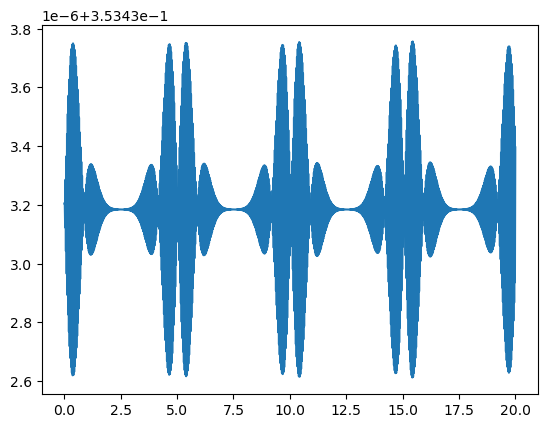

In [55]:
plt.plot(time,l2norm)
plt.show()

## L2-norm for all the three studied cases

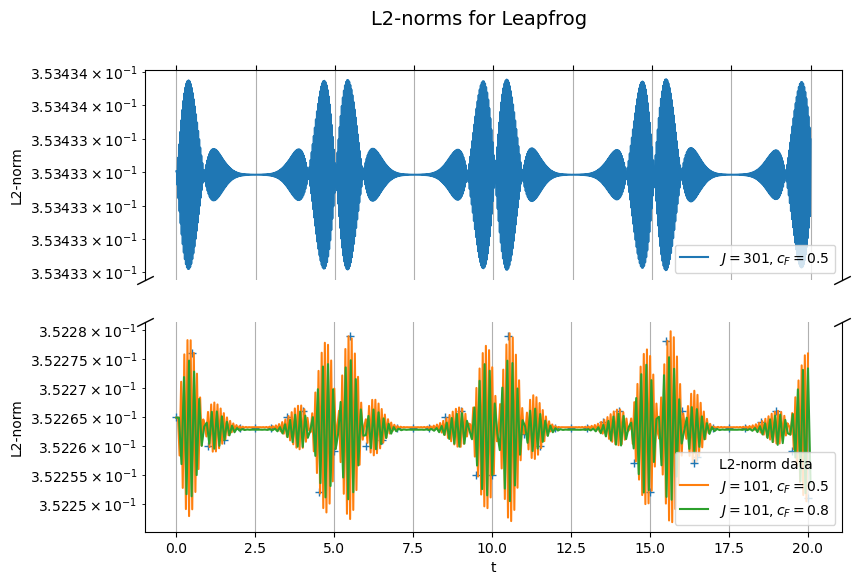

In [37]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')

fig, ax = plt.subplots(2,1, figsize=(9, 6))
ax[1].plot(l2_saved[:,0], l2_saved[:,1], '+', label='L2-norm data')
ax[1].plot(time,l2norm, label='$J=101, c_F=0.5$')
ax[1].plot(time_cf,l2norm_cf, label='$J=101, c_F=0.8$')
ax[0].plot(time_301,l2norm_301,label='$J=301, c_F=0.5$')
#plt.plot(time_2,l2norm_2, label='$J=401, c_F=0.8$')

for i in range(2):
    ax[i].grid(True)
    ax[i].set_ylabel('L2-norm')
    ax[i].set_yscale('log')
    ax[i].legend(loc='lower right')
ax[1].set_xlabel('t')

ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].xaxis.tick_top()
ax[0].tick_params(labeltop=False)  # Non mostriamo le etichette dei tick in alto
ax[1].xaxis.tick_bottom()
d = .5  # Proporzione dell'estensione verticale rispetto a quella orizzontale della linea obliqua
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([0, 1], [0, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 1], [1, 1], transform=ax[1].transAxes, **kwargs)

fig.suptitle('L2-norms for Leapfrog \n', fontsize=14)
plt.savefig('./images_leapfrog/L2_leapfrog_plot.png', dpi=200)
plt.show()